In [1]:
# 读取节点数据
def read_nodes_data(file_path):
    nodes_data = {}
    with open(file_path, 'r') as f:
        for line in f:
            node_id, x, y = line.split()
            nodes_data[int(node_id)] = (float(x), float(y))
    return nodes_data

# 读取边数据
def read_edges_data(file_path):
    edges_data = []
    with open(file_path, 'r') as f:
        for line in f:
            edge_id, source, target, weight = line.split()
            edges_data.append((int(edge_id), int(source), int(target), float(weight)))
    return edges_data

In [4]:

# 测试读取数据函数
nodes_file = "/home/ubuntu/update_documents/nodes.txt"
edges_file = "/home/ubuntu/update_documents/edges.txt"
nodes_data = read_nodes_data(nodes_file)
edges_data = read_edges_data(edges_file)

print("Nodes data:")
print(nodes_data)
print("\nEdges data:")
print(edges_data)


Nodes data:
{0: (769.948669, 2982.984131), 1: (863.275757, 3005.275635), 2: (690.196411, 3333.704834), 3: (1197.556519, 2984.470215), 4: (1261.188599, 2985.956299), 5: (722.436707, 3467.454346), 6: (1316.336426, 2999.331299), 7: (749.586365, 3781.022461), 8: (1474.144165, 2737.776855), 9: (1662.919434, 3148.684814), 10: (1771.942505, 2439.06958), 11: (842.913513, 4259.54834), 12: (1794.850098, 2392.257324), 13: (1830.059814, 2468.048828), 14: (1807.152222, 2400.430908), 15: (1834.302002, 2414.92041), 16: (1827.938721, 2339.12915), 17: (1871.208618, 2504.458252), 18: (1836.422974, 2342.4729), 19: (1863.14856, 2431.267578), 20: (1834.302002, 2304.577148), 21: (2090.951416, 3406.895508), 22: (1885.631836, 2449.472412), 23: (1877.571777, 2359.19165), 24: (1910.660522, 2540.496338), 25: (1845.331543, 2276.341309), 26: (1889.874023, 2364.392822), 27: (2115.555908, 3432.159424), 28: (1920.841675, 2531.951172), 29: (1904.297241, 2472.878662), 30: (1910.660522, 2380.73999), 31: (1905.994141, 23

In [6]:
import networkx as nx

# 计算节点的初始负载
def initial_load(nodes_data, edges_data):
    G = nx.Graph()
    G.add_weighted_edges_from([(source, target, weight) for _, source, target, weight in edges_data])
    initial_loads = nx.betweenness_centrality(G)
    return {node: initial_loads[node] for node in nodes_data}

# 计算节点的负载容量
def capacity(nodes_data, initial_loads, alpha):
    capacities = {}
    for node, load in initial_loads.items():
        capacities[node] = (1 + alpha) * load
    return capacities

In [25]:
import numpy as np
from scipy.spatial import distance

# 计算节点之间的欧几里得距离
def calculate_distances(nodes_data):
    nodes_coords = np.array([coord for _, coord in nodes_data.items()])
    distances = distance.cdist(nodes_coords, nodes_coords, 'euclidean')
    return distances

# 根据平面坐标计算空间中心区域
def calculate_center_region(nodes_data, threshold):
    distances = calculate_distances(nodes_data)
    center_region = []
    MOD = 10000
    for i, node_i in nodes_data.items():
        count = 0
        for j, node_j in nodes_data.items():
            count += distances[i,j]
            # if i != j and distances[i, j] < threshold:
            #     count += 1
        # if count >= len(nodes_data) * 0.5:
        #     center_region.add(i)
        count /= MOD
        center_region.append([count,i])
    return center_region


In [30]:
# 计算空间中心区域
center_threshold =  100
center_region = calculate_center_region(nodes_data, center_threshold)
# 移除中心区域的5个节点
nodes_to_remove = sorted(center_region,key=lambda x:x[0])[:10]
center_node = [node[1] for node in nodes_to_remove][:]
print(center_node)

[1569, 1565, 1566, 1572, 1573, 1562, 1574, 1571, 1578, 1567, 1577, 1586, 1580, 1581, 1595, 1584, 1593, 1564, 1588, 1592, 1589, 1596, 1579, 1597, 1600, 1587, 1560, 1591, 1559, 1557, 1598, 1561, 1607, 1602, 1605, 1558, 1609, 1298, 1603, 1599, 1619, 1570, 1279, 1287, 1278, 1275, 1606, 1615, 1294, 1270, 1563, 1608, 1601, 1263, 1284, 1624, 1613, 1258, 1576, 1616, 1272, 1622, 1274, 1256, 1630, 1621, 1634, 1582, 1266, 1639, 1604, 1614, 1568, 1261, 1632, 1620, 1646, 1265, 1260, 1288, 1625, 1623, 1631, 1247, 1626, 1656, 1295, 1253, 1254, 1611, 1617, 1671, 1257, 1293, 1583, 1246, 1662, 1637, 1627, 1575, 1635, 1650, 1644, 1271, 1239, 1647, 4959, 1610, 1661, 1618, 4958, 1660, 1672, 4944, 1641, 1636, 1594, 1645, 1219, 1215, 4942, 1668, 1652, 1206, 1240, 1590, 1651, 4943, 1585, 1648, 4963, 1211, 4975, 1669, 1667, 4957, 1654, 1238, 4961, 1640, 1655, 1659, 1757, 1225, 1772, 4962, 1221, 1232, 1743, 1664, 1751, 1237, 1665, 1666, 1653, 4960, 1670, 1198, 1673, 2487, 2494, 1760, 1791, 2496, 1228, 1768, 176

In [38]:
# 实现Motter模型，首先移除中心区域的节点，然后根据级联反应移除节点
def motter_model_with_cascading_and_center_removal(nodes_data, edges_data, alpha, center_threshold):
    # 计算初始负载
    initial_loads = initial_load(nodes_data, edges_data)
    # 计算负载容量
    capacities = capacity(nodes_data, initial_loads, alpha)
    # 计算空间中心区域
    center_region = calculate_center_region(nodes_data, center_threshold)
    # 移除中心区域的20个节点
    nodes_to_remove = sorted(center_region,key=lambda x:x[0])[:20]
    # for node in nodes_to_remove:
    #     center_region.remove(node)
    # 构建图
    G = nx.Graph()
    G.add_weighted_edges_from([(source, target, weight) for _, source, target, weight in edges_data])
    center_node = [node[1] for node in nodes_to_remove]
    G.remove_nodes_from(center_node)
    # 迭代次数
    iteration = 0
    while True:
        iteration += 1
        # 计算剩余节点的新负载
        current_loads = nx.betweenness_centrality(G)
        # 移除负载超过负载容量的节点
        overloaded_nodes = [node for node in G.nodes if current_loads[node] > capacities[node]]
        if not overloaded_nodes:
            break
        if len(overloaded_nodes) == len(G.nodes):
            # All nodes overloaded, end simulation
            break
        # 移除策略：根据级联反应移除节点
        nodes_to_remove = []
        for node in overloaded_nodes:
            # if node not in center_region:
            nodes_to_remove.append(node)
        for node_to_remove in nodes_to_remove:
            G.remove_node(node_to_remove)
    return G, iteration

In [ ]:

# 测试Motter模型
alpha = 0.5  # 设置alpha值
center_threshold = 500  # 设置空间中心区域的阈值
G, iterations = motter_model_with_cascading_and_center_removal(nodes_data, edges_data, alpha, center_threshold)
print("Remaining nodes:", G.nodes)
print("Iterations:", iterations)


Alpha: 0.0 Max Connected Component Size: 108 Iterations: 2
Alpha: 0.05263157894736842 Max Connected Component Size: 610 Iterations: 6
Alpha: 0.10526315789473684 Max Connected Component Size: 465 Iterations: 7
Alpha: 0.15789473684210525 Max Connected Component Size: 281 Iterations: 6
Alpha: 0.21052631578947367 Max Connected Component Size: 1343 Iterations: 7
Alpha: 0.2631578947368421 Max Connected Component Size: 1956 Iterations: 10
Alpha: 0.3157894736842105 Max Connected Component Size: 2456 Iterations: 14
Alpha: 0.3684210526315789 Max Connected Component Size: 3371 Iterations: 14
Alpha: 0.42105263157894735 Max Connected Component Size: 3981 Iterations: 12
Alpha: 0.47368421052631576 Max Connected Component Size: 4829 Iterations: 12
Alpha: 0.5263157894736842 Max Connected Component Size: 5179 Iterations: 10
Alpha: 0.5789473684210527 Max Connected Component Size: 4684 Iterations: 10
Alpha: 0.631578947368421 Max Connected Component Size: 4912 Iterations: 11
Alpha: 0.6842105263157894 Max C

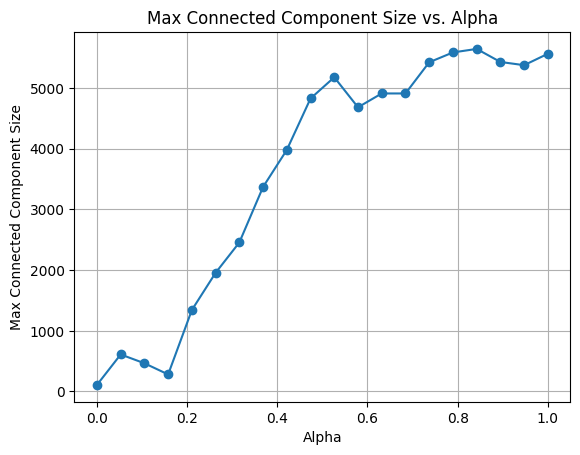

In [34]:
import matplotlib.pyplot as plt

# 模拟不同α值下的网络最大连通分量的变化
def simulate_alpha_range(nodes_data, edges_data, alpha_range, center_threshold):
    max_connected_components = []
    for alpha in alpha_range:
        G, iterations = motter_model_with_cascading_and_center_removal(nodes_data, edges_data, alpha, center_threshold)
        max_connected_component = max(len(component) for component in nx.connected_components(G))
        max_connected_components.append(max_connected_component)
        print("Alpha:", alpha, "Max Connected Component Size:", max_connected_component, "Iterations:", iterations)
    return max_connected_components

# 设置α值范围
alpha_range = np.linspace(0, 1, 20)
# 模拟不同α值下的网络最大连通分量的变化
max_connected_components = simulate_alpha_range(nodes_data, edges_data, alpha_range, center_threshold)

# 绘制图表
plt.plot(alpha_range, max_connected_components, marker='o')
plt.title('Max Connected Component Size vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Max Connected Component Size')
plt.grid(True)
plt.show()


Alpha: 0.26 Max Connected Component Size: 1956 Iterations: 10
Alpha: 0.27 Max Connected Component Size: 2849 Iterations: 12
Alpha: 0.28 Max Connected Component Size: 2917 Iterations: 12
Alpha: 0.29000000000000004 Max Connected Component Size: 2466 Iterations: 13
Alpha: 0.30000000000000004 Max Connected Component Size: 2418 Iterations: 13
Alpha: 0.31000000000000005 Max Connected Component Size: 2412 Iterations: 14
Alpha: 0.32000000000000006 Max Connected Component Size: 2456 Iterations: 14
Alpha: 0.33000000000000007 Max Connected Component Size: 2539 Iterations: 14
Alpha: 0.3400000000000001 Max Connected Component Size: 2552 Iterations: 14
Alpha: 0.3500000000000001 Max Connected Component Size: 2634 Iterations: 13
Alpha: 0.3600000000000001 Max Connected Component Size: 2771 Iterations: 12
Alpha: 0.3700000000000001 Max Connected Component Size: 3358 Iterations: 14
Alpha: 0.3800000000000001 Max Connected Component Size: 3164 Iterations: 15
Alpha: 0.3900000000000001 Max Connected Component

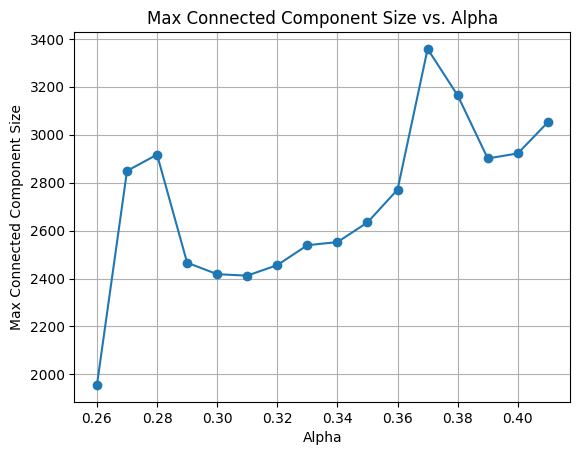

In [35]:
# 寻找a_c  根据结果应该在0.25-0.45之间
# 设置α值范围
alpha_range = np.arange(0.26,0.42,0.01)
# 模拟不同α值下的网络最大连通分量的变化
max_connected_components = simulate_alpha_range(nodes_data, edges_data, alpha_range, center_threshold)

# 绘制图表
plt.plot(alpha_range, max_connected_components, marker='o')
plt.title('Max Connected Component Size vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Max Connected Component Size')
plt.grid(True)
plt.show()

Alpha: 0.41 Max Connected Component Size: 3052 Iterations: 16
Alpha: 0.415 Max Connected Component Size: 3352 Iterations: 18
Alpha: 0.42 Max Connected Component Size: 3354 Iterations: 19
Alpha: 0.425 Max Connected Component Size: 3991 Iterations: 12
Alpha: 0.43 Max Connected Component Size: 3998 Iterations: 11
Alpha: 0.435 Max Connected Component Size: 3914 Iterations: 12


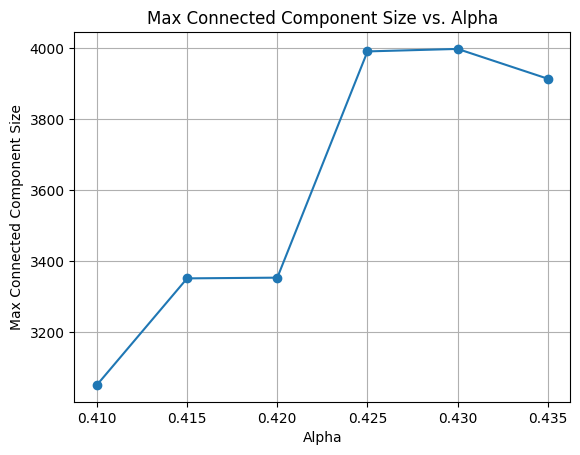

In [36]:
# 寻找a_c  根据结果应该在0.41-0.43之间
# 设置α值范围
alpha_range = np.arange(0.41,0.435,0.005)
# 模拟不同α值下的网络最大连通分量的变化
max_connected_components = simulate_alpha_range(nodes_data, edges_data, alpha_range, center_threshold)

# 绘制图表
plt.plot(alpha_range, max_connected_components, marker='o')
plt.title('Max Connected Component Size vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Max Connected Component Size')
plt.grid(True)
plt.show()

In [40]:
# 模拟最大连通分量和第二大连通分量随级联步骤的变化
def simulate_cascading(nodes_data, edges_data, alpha, center_threshold):
    # 计算初始负载
    initial_loads = initial_load(nodes_data, edges_data)
    # 计算负载容量
    capacities = capacity(nodes_data, initial_loads, alpha)
    # 计算空间中心区域
    center_region = calculate_center_region(nodes_data, center_threshold)
    # 移除中心区域的20个节点
    nodes_to_remove = sorted(center_region,key=lambda x:x[0])[:20]
    # for node in nodes_to_remove:
    #     center_region.remove(node)
    # 构建图
    G = nx.Graph()
    G.add_weighted_edges_from([(source, target, weight) for _, source, target, weight in edges_data])
    center_node = [node[1] for node in nodes_to_remove]
    G.remove_nodes_from(center_node)
    # G, _ = motter_model_with_cascading_and_center_removal(nodes_data, edges_data, alpha, center_threshold)
    max_connected_component_sizes = []
    second_largest_component_sizes = []
    sizes = sorted([len(component) for component in nx.connected_components(G)], reverse=True)
    max_connected_component_sizes.append(sizes[0])
    second_largest_component_sizes.append(sizes[1] if len(sizes) > 1 else 0)
    iteration = 0
    while True:
        iteration += 1
        overloaded_nodes = []
        current_loads = nx.betweenness_centrality(G)
        for node in G.nodes:
            if current_loads[node] > capacities[node]:
                overloaded_nodes.append(node)
        if not overloaded_nodes:
            break
        if len(overloaded_nodes) == len(G.nodes):
            # All nodes overloaded, end simulation
            break
        for node_to_remove in overloaded_nodes:
            G.remove_node(node_to_remove)
        sizes = sorted([len(component) for component in nx.connected_components(G)], reverse=True)
        max_connected_component_sizes.append(sizes[0])
        second_largest_component_sizes.append(sizes[1] if len(sizes) > 1 else 0)
    return max_connected_component_sizes, second_largest_component_sizes,iteration

# 设置α值
alphas = [0.42, 0.415, 0.425]


plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alphas):
    max_connected_component_sizes, second_largest_component_sizes,iteration = simulate_cascading(nodes_data, edges_data, alpha, center_threshold)
    # 设置级联步骤范围
    cascade_steps = range(0, iteration)
    plt.subplot(2, 1, 1)
    plt.plot(cascade_steps, max_connected_component_sizes, label='Alpha = {}'.format(alpha))
    plt.title('Max Connected Component')
    plt.xlabel('Cascade Steps')
    plt.ylabel('Component Size')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(cascade_steps, second_largest_component_sizes, label='Alpha = {}'.format(alpha))
    plt.title('Second Largest Component')
    plt.xlabel('Cascade Steps')
    plt.ylabel('Component Size')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('/home/ubuntu/generate_documents/alpha_{}.png'.format(alpha))
    plt.clf()


<Figure size 1000x600 with 0 Axes>

In [47]:

def vision_model_state(nodes_data, edges_data,alpha,):
    # 设置初始失效的节点、当前步失效的节点和已经失效的节点的颜色
    initial_failure_color = 'red'
    current_failure_color = 'blue'
    failed_color = 'gray'
    # 设置节点状态对应的颜色
    colors = {'initial_failure': 'red', 'current_failure': 'blue', 'failed': 'yellow', 'not_failed': 'gray'}


    # 获取节点坐标
    node_coordinates = np.array([coord[1:] for coord in nodes_data.values()])

    # 初始化节点状态字典，初始状态为未失效
    node_status = {node: 'not_failed' for node in nodes_data.keys()}
    # 计算初始负载
    initial_loads = initial_load(nodes_data, edges_data)
    # 计算负载容量
    capacities = capacity(nodes_data, initial_loads, alpha)
    # 计算空间中心区域
    center_region = calculate_center_region(nodes_data, center_threshold)
    # 移除中心区域的20个节点
    nodes_to_remove = sorted(center_region,key=lambda x:x[0])[:20]
    # for node in nodes_to_remove:
    #     center_region.remove(node)
    # 构建图
    initial_G = nx.Graph()
    initial_G.add_weighted_edges_from([(source, target, weight) for _, source, target, weight in edges_data])
    G = initial_G.copy()
    center_node = [node[1] for node in nodes_to_remove]
    G.remove_nodes_from(center_node)
    # 模拟级联失效过程，并可视化
    # G, _ = motter_model_with_cascading_and_center_removal(nodes_data, edges_data, 0.42, center_threshold)
    initial_failure_nodes = center_node
    for i in range(1, 1001):  # 假设最大1000步
        overloaded_nodes = []
        current_failure_nodes = []
        current_loads = nx.betweenness_centrality(G)
        for node in G.nodes:
            if current_loads[node] > capacities[node]:
                overloaded_nodes.append(node)
        if not overloaded_nodes:
            break
        for node_to_remove in overloaded_nodes:
            node_status[node_to_remove] = 'failed'
            G.remove_node(node_to_remove)
        if i == 1:
            initial_failure_nodes = overloaded_nodes
        else:
            current_failure_nodes = overloaded_nodes
        # 可视化
        plt.figure(figsize=(8, 6))
        # pos = {node: (nodes_data[node][1], nodes_data[node][2]) for node in G.nodes()}
        pos = {node:pos for node,pos in nodes_data.items()}
        # nx.draw(G, pos=node_coordinates, node_color=[initial_failure_color if node in initial_failure_nodes else current_failure_color if node in current_failure_nodes else failed_color for node in nodes_data.keys()], with_labels=False, node_size=5)
        nx.draw(initial_G, pos=pos, node_color=[colors['initial_failure'] if node in initial_failure_nodes else colors['current_failure'] if node in current_failure_nodes else colors['failed'] if node_status[node] == 'failed' else colors['not_failed'] for node in initial_G.nodes()], with_labels=False, node_size=0.5)

        plt.title('Cascade Step {}'.format(i))
        plt.grid(False)
        plt.axis('off')
        plt.savefig('/home/ubuntu/generate_documents/cascade_step/cascade_step_{}.png'.format(i))
        plt.close()

    # 可视化最终状态
    plt.figure(figsize=(8, 6))
    # pos = {node: (nodes_data[node][1], nodes_data[node][2]) for node in G.nodes()}
    pos = {node:pos for node,pos in nodes_data.items()}
    # nx.draw(G, pos, node_color=[initial_failure_color if node in initial_failure_nodes else failed_color for node in nodes_data.keys()], with_labels=False, node_size=0.5)
    nx.draw(initial_G, pos=pos, node_color=[colors['initial_failure'] if node in initial_failure_nodes else colors['failed'] if node_status[node] == 'failed' else colors['not_failed'] for node in initial_G.nodes()], with_labels=False, node_size=0.5)

    plt.title('Final State')
    plt.grid(False)
    plt.axis('off')
    plt.savefig('/home/ubuntu/generate_documents/cascade_step/final_state.png')
    plt.close()

vision_model_state(nodes_data, edges_data,0.42,)
